In [1]:
import graphlearning as gl
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import scipy.io as sio
from scipy import sparse
import seaborn as sns

# seed
seed = 42

In [2]:
# problem parameters
TESTCASE_PATH = 'testcase/'
TESTCASE_COLLECTION = ['494_bus', 'bcspwr01', 'bcspwr02', 'bcspwr05']
TESTCASE_NAME = TESTCASE_COLLECTION[2]

DIRECTED_GRAPH = False

# Load graph
test = sio.matlab.loadmat(TESTCASE_PATH + TESTCASE_NAME + '.mat')

# print the content of the mat file line by line
for key in test.keys():
    print(key + " : " + str(test[key]))
    # if key == 'Problem':
    #     for it in test[key][0][0]:
    #         print(it)


# G = nx.random_k_out_graph(10, 3, 0.5, seed=seed)
# pos = nx.spring_layout(G, seed=seed)
# nx.draw_networkx(G, pos=pos, with_labels=True)

__header__ : b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sat Sep  6 04:04:23 2008'
__version__ : 1.0
__globals__ : []
Problem : [[(array(['SYMMETRIC STRUCTURE OF A SMALL TEST POWER SYSTEM'], dtype='<U48'), <49x49 sparse matrix of type '<class 'numpy.float64'>'
  	with 167 stored elements in Compressed Sparse Column format>, array(['HB/bcspwr02'], dtype='<U11'), array([[14]], dtype=uint8), array(['1981'], dtype='<U4'), array(['B. Dembart, J. Lewis'], dtype='<U20'), array(['I. Duff, R. Grimes, J. Lewis'], dtype='<U28'), array(['power network problem'], dtype='<U21'))]]


<class 'numpy.ndarray'>


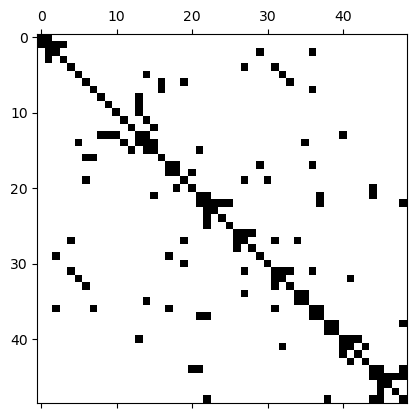

[INFO] Number of nodes:  49
[INFO] Number of edges:  59
[INFO] Largest entry in the adjacency matrix:  1.0
[INFO] Smallest entry in the adjacency matrix:  0.0


In [3]:
# extract the adjacency matrix
A = np.array(test['Problem'][0][0][1].todense())
print(type(A))
plt.spy(A)
plt.show()

# print the graph information: number of nodes and edges
print('[INFO] Number of nodes: ', A.shape[0])
print('[INFO] Number of edges: ', int(np.count_nonzero(A- np.diag(np.diag(A)))/2)) # after removing self-loops
print('[INFO] Largest entry in the adjacency matrix: ', np.max(A))
print('[INFO] Smallest entry in the adjacency matrix: ', np.min(A))

# if the graph is undirected, make it directed by deleting the lower triangular part
if DIRECTED_GRAPH == True:
    A = np.triu(A)
    plt.spy(A)
    plt.show()

[INFO] Symmetric matrix:  True
[INFO] Displaying the graph information...
     [INFO] Is the graph directed?  False
     [INFO] Is the graph a tree?  False
     [INFO] Number of nodes:  49
     [INFO] Number of edges:  59
     [INFO] Node positions:  {0: array([-0.31468597,  0.69319243]), 1: array([-0.23334277,  0.56622579]), 2: array([-0.17003668,  0.31127838]), 3: array([-0.26486766,  0.75340433]), 4: array([ 0.47706449, -0.01914008]), 5: array([ 0.39776629, -0.06522653]), 6: array([0.24155348, 0.00737848]), 7: array([-0.02664767,  0.10645383]), 8: array([0.42576806, 0.23637801]), 9: array([ 0.55092402, -0.08515266]), 10: array([0.58436188, 0.02490713]), 11: array([0.42490096, 0.35786161]), 12: array([0.03954815, 0.33535401]), 13: array([ 0.43062091, -0.00122819]), 14: array([0.35584518, 0.24528418]), 15: array([0.09819527, 0.17805729]), 16: array([0.10063169, 0.01040757]), 17: array([-0.26472594,  0.15008756]), 18: array([-0.49042138,  0.13075118]), 19: array([0.36600412, 0.16086797

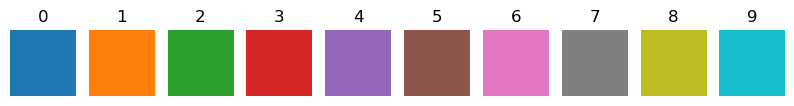

     [INFO] Node classes:  {0: 3, 1: 4, 2: 9, 3: 8, 4: 2, 5: 2, 6: 3, 7: 1, 8: 6, 9: 2, 10: 2, 11: 5, 12: 1, 13: 7, 14: 2, 15: 5, 16: 8, 17: 4, 18: 1, 19: 1, 20: 6, 21: 3, 22: 7, 23: 8, 24: 1, 25: 1, 26: 9, 27: 0, 28: 5, 29: 2, 30: 1, 31: 5, 32: 8, 33: 3, 34: 4, 35: 6, 36: 2, 37: 2, 38: 8, 39: 8, 40: 6, 41: 9, 42: 4, 43: 1, 44: 2, 45: 1, 46: 5, 47: 9, 48: 9}


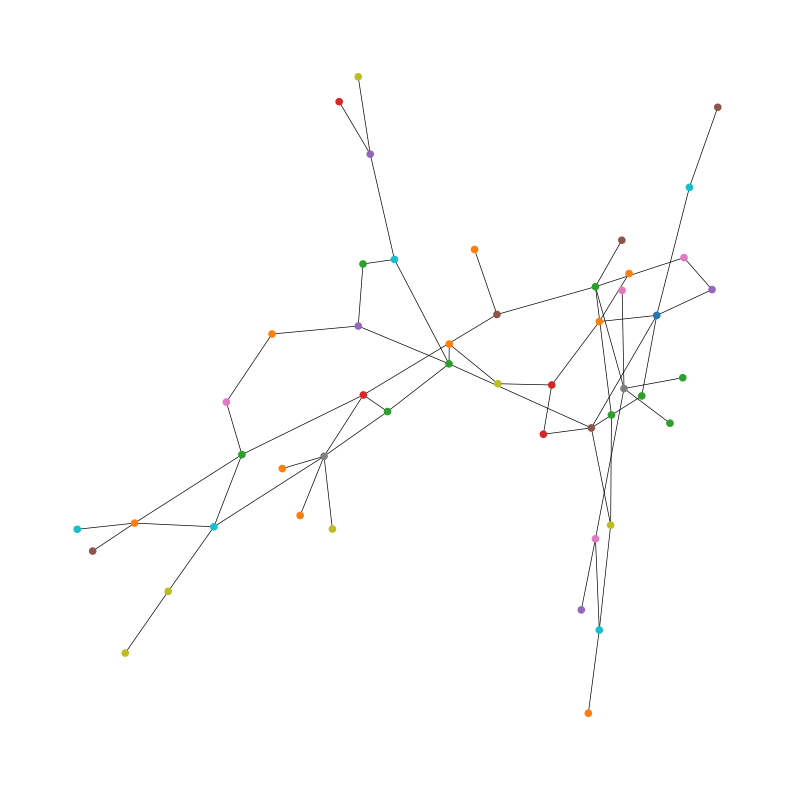

In [4]:
# remove the diagonal (self-loops)
A_no_diag = A - np.diag(np.diag(A))

# make the graph directed by removing the lower triangular part
# A_no_diag = np.triu(A_no_diag)
# is the matrix symmetric?
print('[INFO] Symmetric matrix: ', np.allclose(A, A.T, atol=1e-8))

if DIRECTED_GRAPH == True:
    # create a networkx graph
    G = nx.from_numpy_matrix(A_no_diag, create_using=nx.DiGraph())
else:
    # create a networkx graph
    G = nx.from_numpy_matrix(A_no_diag)

print("[INFO] Displaying the graph information...")
print("     [INFO] Is the graph directed? ", nx.is_directed(G))
print("     [INFO] Is the graph a tree? ", nx.is_tree(G))
# print the graph information: number of nodes and edges
print('     [INFO] Number of nodes: ', G.number_of_nodes())
print('     [INFO] Number of edges: ', G.number_of_edges())

# use spring layout to get the node positions
node_pos = nx.spring_layout(G, k=0.015, iterations=20)
print('     [INFO] Node positions: ', node_pos)

# randomly generate 10 distinct colors
colors = sns.color_palette(None, 10)
color_map = np.array(colors)

plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(color_map[i].reshape(1, 1, 3))
    plt.title("{}".format(i))
    plt.axis("off")
    plt.subplot(1, 10, 10)
    plt.axis("off")
plt.show()

# randomly assign a color to each node
node_color = np.random.randint(0, 10, G.number_of_nodes())
node_color = color_map[node_color]

# identify the node class given color, put into a dictionary
node_class = {}
for i in range(G.number_of_nodes()):
    node_class[i] = np.where(np.all(color_map == node_color[i], axis=1))[0][0]

print('     [INFO] Node classes: ', node_class)

# draw the graph
plt.figure(figsize=(10,10))
nx.draw_networkx(G, with_labels=False, node_size=20, width=0.5, pos=node_pos, node_color=node_color)
plt.axis('off')
plt.show()

In [5]:
def wirelength(G_, pos_, ord_=1):
    """
    Compute the wirelength of a graph
    :param G: a networkx graph
    :param pos: node positions
    :return: wirelength
    """
    wirelength = 0
    for edge in G_.edges():
        wirelength += np.linalg.norm(pos_[edge[0]] - pos_[edge[1]], ord=ord_)
    return wirelength

print("#### Testing Wirelength ####:")
print('[INFO] Wirelength of the graph: ', wirelength(G, node_pos))
print()

def merge_node(G_, pos_, color_, node_u_, node_v_, pos_merge='mean'):
    """
    Contracting node u and v into a single node
    Node contraction identifies the two nodes as a single node incident to any edge that was incident to the original two nodes.
    Node contraction should preserve the graph's topology.
    NOTE: The right node v will be merged into the node u, so only u will appear in the returned graph
    :param G: a networkx graph
    :param pos: node positions
    :param color: node colors
    :param node_u_: node u
    :param node_v_: node v
    :return: a new graph with node u and v merged, and the position of the merged node, and the color of the merged node
    """
    # check if the two nodes exist in the graph
    assert node_u_ in G_.nodes() and node_v_ in G_.nodes(), '[ERROR] Node {} or node {} does not exist in the graph'.format(node_u_, node_v_)
    # the two nodes are distinct
    assert node_u_ != node_v_, '[ERROR] Node {} and node {} are the same'.format(node_u_, node_v_)
    # the two nodes are adjacent
    assert node_v_ in G_.neighbors(node_u_), '[ERROR] Node {} and node {} are not adjacent'.format(node_u_, node_v_)
    # # topology preserving
    # assert G_.degree(node_u_) + G_.degree(node_v_) - 2 == G_.degree(node_u_, node_v_), '[ERROR] Node contraction does not preserve the graph topology'

    print('[INFO] Merging node {} and node {}'.format(node_u_, node_v_))

    new_pos = None
    new_color = np.copy(color_)

    # merge position (by default, delete node v)
    if pos_merge == 'mean':
        # take the mean of the positions of the merged nodes
        pos_merge = np.mean([pos_[node_u_], pos_[node_v_]], axis=0)
        # everything except node v
        new_pos = {k: pos_[k] for k in pos_ if k != node_v_}
        new_pos[node_u_] = pos_merge
    elif pos_merge == 'u':
        # delete node v and take the position of node u
        new_pos = {k: pos_[k] for k in pos_ if k != node_v_}
    elif pos_merge == 'v':
        # take the position of node v
        pos_merge = pos_[node_v_]
        new_pos = {k: pos_[k] for k in pos_ if k != node_v_}
        new_pos[node_u_] = pos_merge

    # merge color (averaging RGB values)
    color_merge = np.mean([color_[node_u_], color_[node_v_]], axis=0)
    new_color = np.delete(color_, node_v_, axis=0)
    new_color[node_u_] = color_merge

    # merge node
    return nx.contracted_nodes(G_, node_u_, node_v_, self_loops=False), new_pos, new_color

# print('[INFO] Edges of the graph: ', G.edges())
print("#### Testing Node Merging ####:")
print('     [INFO] Number of nodes before merging: ', G.number_of_nodes())
print('     [INFO] List of nodes: ', G.nodes())
print('     [INFO] Wirelength before merging: ', wirelength(G, node_pos))  

G_merged, node_pos_merged, node_color_merged = merge_node(G, node_pos, node_color, 0, 1)
print('     [INFO] Number of nodes of the merged graph: ', G_merged.number_of_nodes())
print('     [INFO] List of nodes: ', G_merged.nodes())
print('     [INFO] Wirelength of the merged graph: ', wirelength(G_merged, node_pos))

#### Testing Wirelength ####:
[INFO] Wirelength of the graph:  15.170554451951865

#### Testing Node Merging ####:
     [INFO] Number of nodes before merging:  49
     [INFO] List of nodes:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]
     [INFO] Wirelength before merging:  15.170554451951865
[INFO] Merging node 0 and node 1
     [INFO] Number of nodes of the merged graph:  48
     [INFO] List of nodes:  [0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]
     [INFO] Wirelength of the merged graph:  15.061881224982695


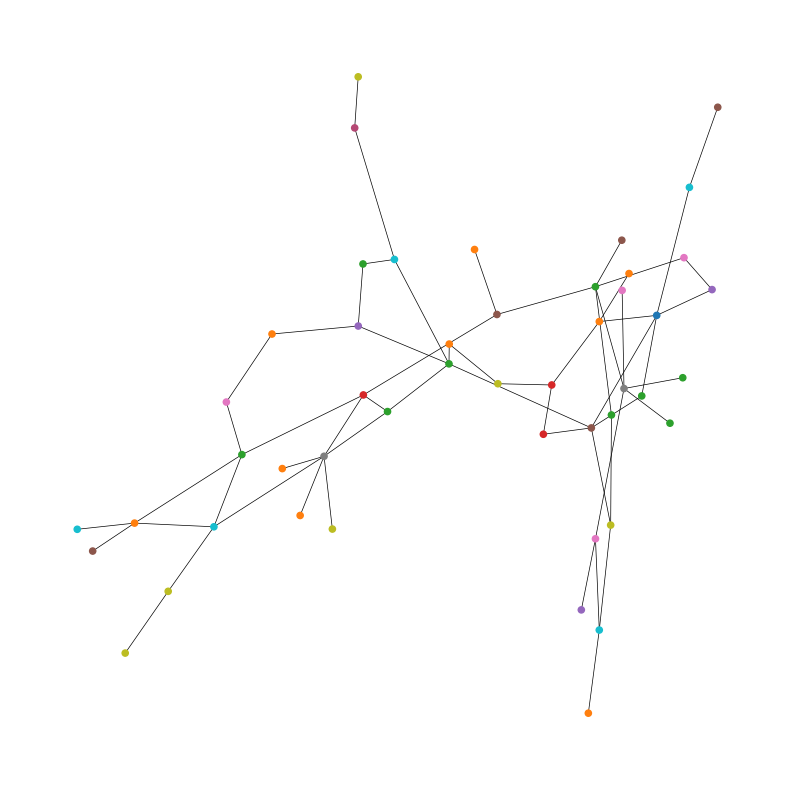

In [6]:
# draw the graph
plt.figure(figsize=(10,10))
nx.draw_networkx(G_merged, with_labels=False, node_size=20, width=0.5, pos=node_pos_merged, node_color=node_color_merged)
plt.axis('off')
plt.show()